<a href="https://colab.research.google.com/github/TaurusAg9/The_Sparks_Foundation_Tasks/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction Using Unsupervised Machine Learning
#**Task**: To predict the optimum number of clusters and represent it visually
#NAME: MAHANAND ADIMULAM

#Importing Libreries

In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Importing The Dataset

In [247]:
df=pd.read_csv('/content/sample_data/Iris.csv')

In [248]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [249]:
df.shape

(150, 6)

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

#Exploratory Data Analysis

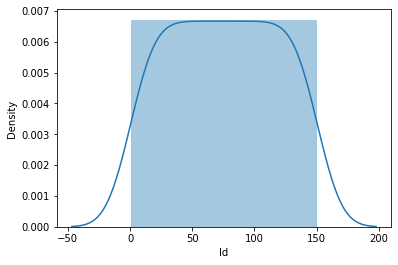

In [ ]:
sns.distplot(df['Id'])

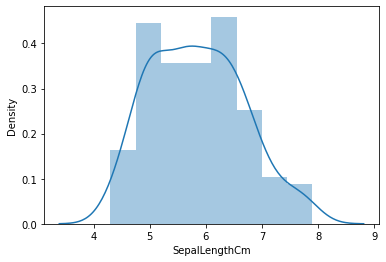

In [ ]:
sns.distplot(df['SepalLengthCm'])

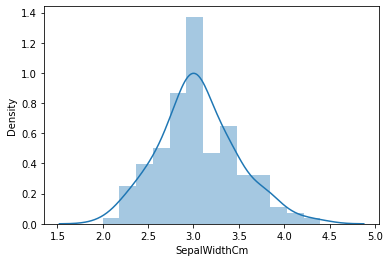

In [ ]:
sns.distplot(df['SepalWidthCm'])

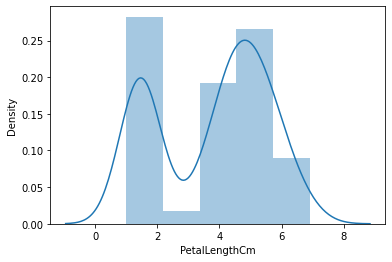

In [ ]:
sns.distplot(df['PetalLengthCm'])

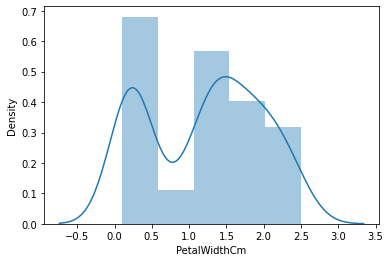

In [ ]:
sns.distplot(df['PetalWidthCm'])

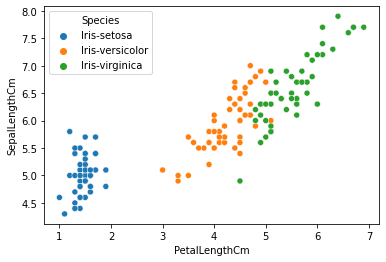

In [ ]:
sns.scatterplot(x=df['PetalLengthCm'],y=df['SepalLengthCm'],hue=df['Species']);

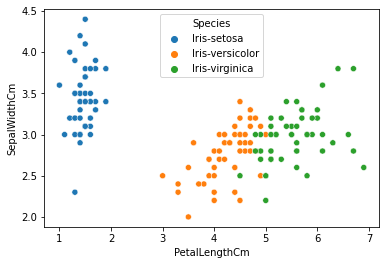

In [ ]:
sns.scatterplot(x=df['PetalLengthCm'],y=df['SepalWidthCm'],hue=df['Species']);

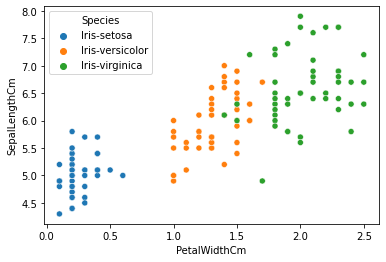

In [ ]:
sns.scatterplot(x=df['PetalWidthCm'],y=df['SepalLengthCm'],hue=df['Species']);

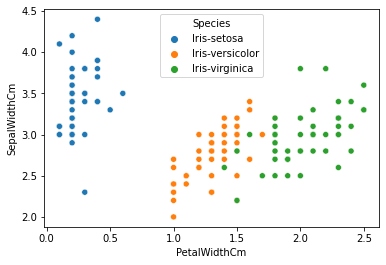

In [ ]:
sns.scatterplot(x=df['PetalWidthCm'],y=df['SepalWidthCm'],hue=df['Species']);

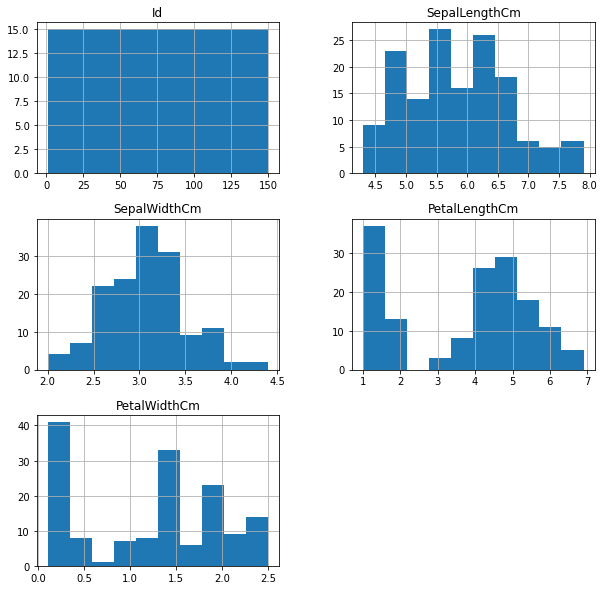

In [ ]:
df.hist(figsize=(10,10));

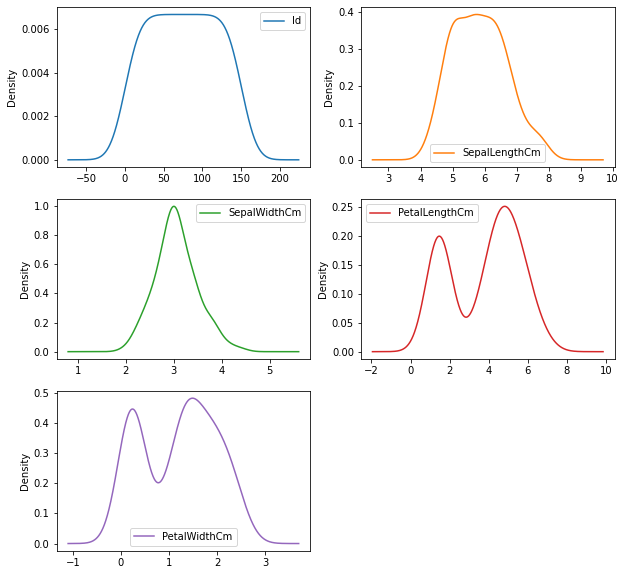

In [ ]:
df.plot(kind='density',subplots=True,layout=(3,2),sharex=False,figsize=(10,10));

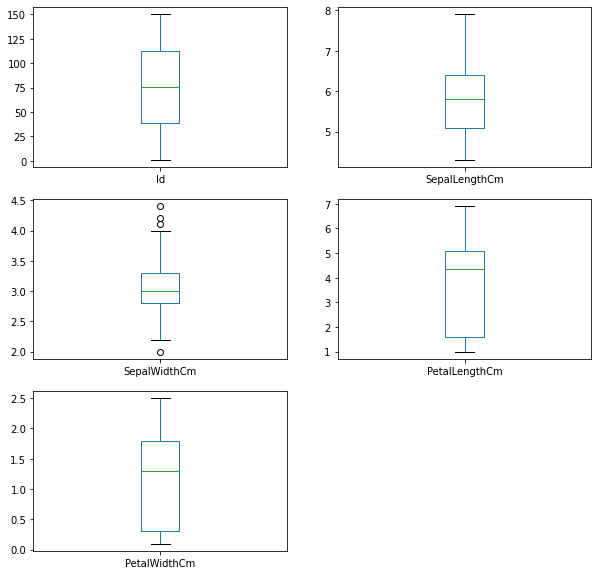

In [ ]:
df.plot(kind='box',subplots=True,layout=(3,2),sharex=False,figsize=(10,10));

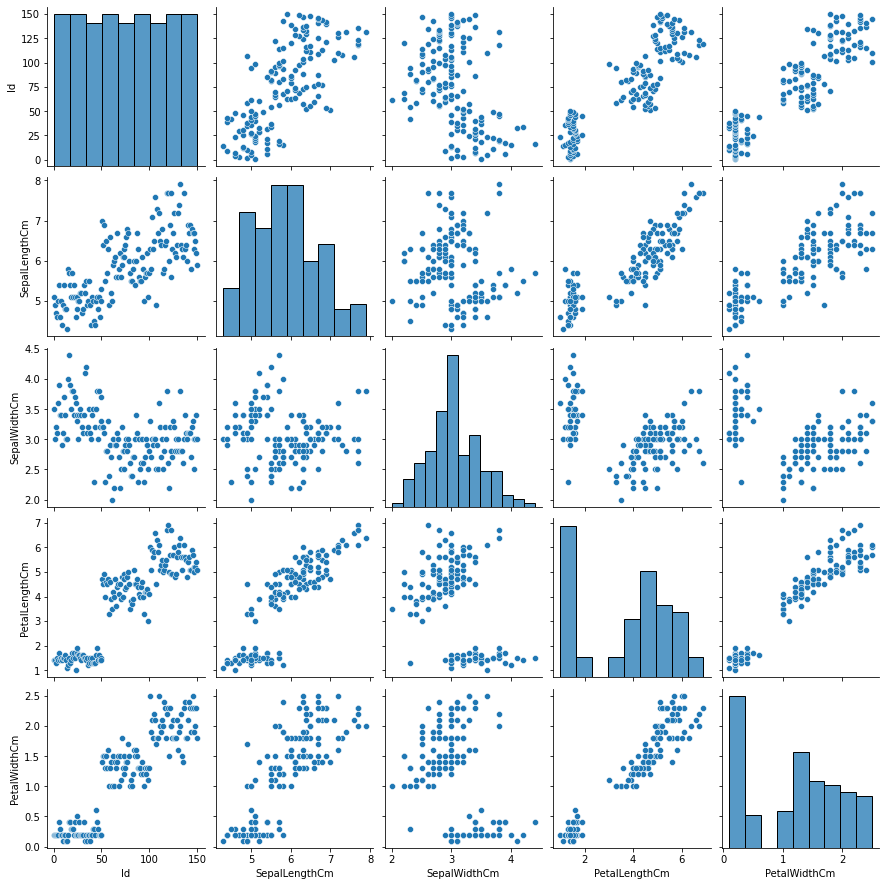

In [ ]:
sns.pairplot(df);

<Figure size 432x288 with 0 Axes>

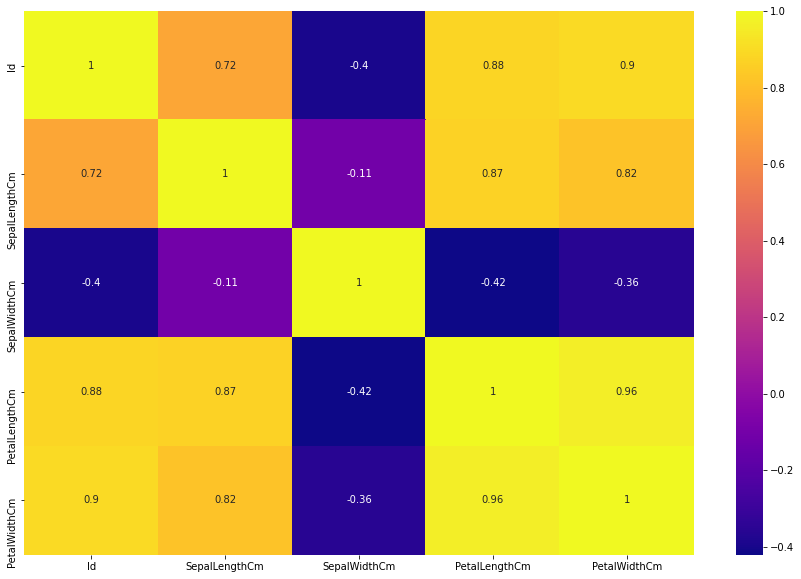

In [ ]:
fig=plt.figure()
fig.ax=plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),cmap='plasma',annot=True);

#Elbow Method

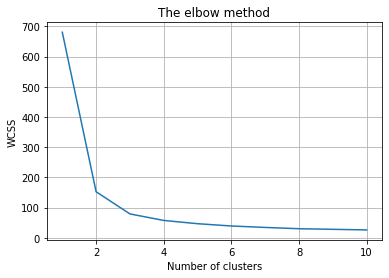

In [ ]:
from sklearn.cluster import KMeans
wcss = []
X=df.iloc[:,1:-1].values
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.grid()
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as 3.

#Intialization Using K-means++

In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(X)

#Visualizing The Clusters

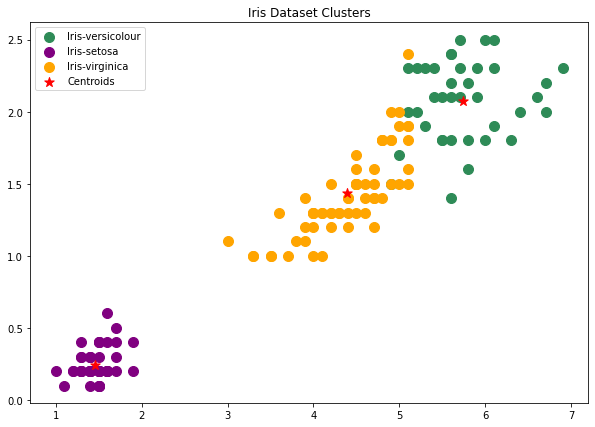

In [250]:
fig=plt.figure(figsize=(10,7))
plt.scatter(X[y_kmeans==0,2],X[y_kmeans==0,3],s=100,c='seagreen',label='Iris-versicolour')
plt.scatter(X[y_kmeans==1,2],X[y_kmeans==1,3],s=100,c='purple',label='Iris-setosa')
plt.scatter(X[y_kmeans==2,2],X[y_kmeans==2,3],s=100,c='orange',label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3],s = 100, c = 'r',marker='*', label = 'Centroids')
plt.title('Iris Dataset Clusters')
plt.legend()
plt.show()